# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
weather_api_key = "b66506d86c28e3321e7e88b49d4983d5"

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
 # List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

609

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [17]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
city = 'london'
# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="
#get weather data for London and convert reponse to json
response = requests.get(query_url + city)
weather_json = response.json()
# let's see the result
display(weather_json)


{'coord': {'lon': -0.13, 'lat': 51.51},
 'weather': [{'id': 804,
   'main': 'Clouds',
   'description': 'overcast clouds',
   'icon': '04n'}],
 'base': 'stations',
 'main': {'temp': 60.96,
  'feels_like': 55.42,
  'temp_min': 57.99,
  'temp_max': 66,
  'pressure': 1018,
  'humidity': 63},
 'visibility': 10000,
 'wind': {'speed': 9.17, 'deg': 260},
 'clouds': {'all': 99},
 'dt': 1598483521,
 'sys': {'type': 1,
  'id': 1414,
  'country': 'GB',
  'sunrise': 1598504752,
  'sunset': 1598554708},
 'timezone': 3600,
 'id': 2643743,
 'name': 'London',
 'cod': 200}

In [18]:
city_weather = []



for city in cities:
    #gets response for each city
    
    response = requests.get(query_url + city).json()
    
    try:
        city_dict = {
            "city_name" : response["name"],
            "cloudiness" : response ["clouds"]["all"],
            "country" : response["sys"]["country"],
            "data" : response["dt"],
            "humidity" :response["main"]["humidity"],
            "lat" : response["coord"]["lat"],
            "lon" : response["coord"]["lon"],
            "max_temp" : response["main"]["temp_max"],
            "wind_speed" : response["wind"]["speed"]
        }
        city_weather.append(city_dict)
    
        print(f" city_name:{response['name']} of ID:{response['id']}")
    
    # Handle exceptions for a city that is not available in the API
    except:
        # Append null values
        print("City not found. Skipping...")


 city_name:Kilosa of ID:157403
 city_name:Bluff of ID:2206939
City not found. Skipping...
 city_name:Longyearbyen of ID:2729907
 city_name:Kismayo of ID:55671
 city_name:Byron Bay of ID:2172880
 city_name:Tūkrah of ID:88834
 city_name:Norman Wells of ID:6089245
 city_name:Collie of ID:2074113
 city_name:Avarua of ID:4035715
 city_name:Kavieng of ID:2094342
City not found. Skipping...
City not found. Skipping...
 city_name:Exeter of ID:2649808
 city_name:Pangnirtung of ID:6096551
 city_name:Rikitea of ID:4030556
 city_name:Carnarvon of ID:2074865
 city_name:Garoowe of ID:58933
City not found. Skipping...
 city_name:Mar del Plata of ID:3430863
City not found. Skipping...
 city_name:Lata of ID:2738381
 city_name:Sinnamary of ID:3380290
 city_name:Pervomayskoye of ID:797213
 city_name:Okhotsk of ID:2122605
 city_name:Leningradskiy of ID:2123814
 city_name:Hilo of ID:5855927
 city_name:Daru of ID:2098329
 city_name:Bredasdorp of ID:1015776
 city_name:Lompoc of ID:5367788
 city_name:Punta Ar

 city_name:Nguruka of ID:151567
 city_name:Taltal of ID:3870243
City not found. Skipping...
 city_name:Nuevo Progreso of ID:3522526
 city_name:Gimli of ID:5961417
 city_name:Turukhansk of ID:1488903
 city_name:Passo de Camaragibe of ID:3388341
 city_name:Shimoda of ID:1852357
 city_name:Paamiut of ID:3421193
 city_name:Nouakchott of ID:2377450
 city_name:Río Gallegos of ID:3838859
 city_name:Lázaro Cárdenas of ID:4026082
City not found. Skipping...
 city_name:Saint Simons of ID:4220862
 city_name:Nizhneudinsk of ID:1497549
 city_name:Caravelas of ID:3466980
 city_name:Kumluca of ID:305681
 city_name:Tura of ID:1254046
 city_name:Qaqortoq of ID:3420846
 city_name:Gijón of ID:3121424
 city_name:Tiksi of ID:2015306
 city_name:Kupang of ID:2057087
 city_name:Matara of ID:1235846
City not found. Skipping...
City not found. Skipping...
 city_name:Phalaborwa of ID:965528
 city_name:Tuatapere of ID:2180815
 city_name:Ianca of ID:675840
 city_name:Nago of ID:1856068
 city_name:La Ronge of ID:60

 city_name:Lucapa of ID:145724
 city_name:Turaif of ID:101312
 city_name:Melipilla of ID:3880107
City not found. Skipping...
 city_name:Vitim of ID:2013375
 city_name:Tretten of ID:3134016
 city_name:Hambantota of ID:1244926
 city_name:Baykit of ID:1510689
 city_name:Lagos of ID:2332453
 city_name:Ahipara of ID:2194098
 city_name:Ushibukamachi of ID:1849154
 city_name:Sisophon of ID:1822207
 city_name:Meadow Lake of ID:5478673
 city_name:Neuquén of ID:3843123
 city_name:Härnösand of ID:2707684
 city_name:Tsukumiura of ID:1849661
 city_name:Broome of ID:5110365
 city_name:Chara of ID:2025630
 city_name:Uttaradit of ID:1605214
 city_name:Mnogovershinnyy of ID:2019935
 city_name:Barranca of ID:3946820
 city_name:Alpine of ID:5323401
 city_name:Elmvale of ID:5948094
 city_name:Tan An of ID:1567069
 city_name:Praia da Vitória of ID:3372760
 city_name:Dawlatabad of ID:1142226
 city_name:Saint Anthony of ID:5044290
 city_name:Thoen of ID:1150154
 city_name:Wattegama of ID:1224061
 city_name:Ā

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [19]:
weather_df = pd.DataFrame(city_weather)
weather_df.head()

,city_name,cloudiness,country,data,humidity,lat,lon,max_temp,wind_speed
0,Kilosa,62,TZ,1598484557,80,-6.83,36.98,70.07,4.29
1,Bluff,59,NZ,1598484558,72,-46.60,168.33,45.00,11.01
2,Longyearbyen,75,SJ,1598484558,69,78.22,15.64,39.20,10.29
3,Kismayo,11,SO,1598484558,83,-0.36,42.55,77.05,15.64
4,Byron Bay,2,AU,1598484559,67,-28.65,153.62,63.00,6.93


In [22]:
weather_df.to_csv("weather_df.csv")
weather_df.describe()

,cloudiness,data,humidity,lat,lon,max_temp,wind_speed
count,561.000000,5.610000e+02,561.000000,561.000000,561.000000,561.000000,561.000000
mean,49.108734,1.598485e+09,72.857398,20.099037,16.157558,67.579037,7.157344
std,37.045782,9.599283e+01,20.140515,33.474659,88.921204,14.105120,4.614843
min,0.000000,1.598484e+09,1.000000,-54.800000,-175.200000,33.800000,0.400000
25%,12.000000,1.598485e+09,64.000000,-8.010000,-59.650000,55.510000,3.510000
50%,47.000000,1.598485e+09,78.000000,22.890000,18.700000,68.720000,6.200000
75%,85.000000,1.598485e+09,87.000000,48.420000,88.120000,78.480000,9.620000
max,100.000000,1.598485e+09,100.000000,78.220000,179.320000,109.400000,28.860000


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [24]:
humid = weather_df.loc[weather_df["humidity"]>100]
humid

,city_name,cloudiness,country,data,humidity,lat,lon,max_temp,wind_speed


In [17]:
#  Get the indices of cities that have humidity over 100%.


Int64Index([], dtype='int64')

In [19]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.07,172.79,83.32,74,84,10.42,KI,1593605283
1,yerbogachen,61.28,108.01,79.52,58,20,7.70,RU,1593605121
2,cape town,-33.93,18.42,73.00,77,27,4.70,ZA,1593605039
3,touba,8.28,-7.68,79.97,75,82,3.58,CI,1593605284
4,jamestown,42.10,-79.24,64.00,88,1,6.93,US,1593605284


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

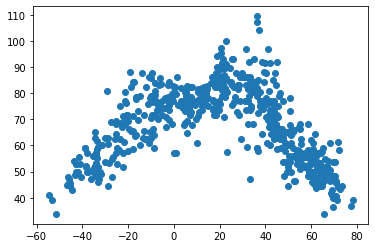

In [25]:
plt.scatter(weather_df["lat"],weather_df["max_temp"])

## Latitude vs. Humidity Plot

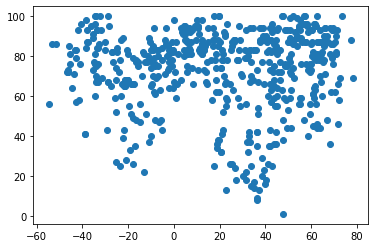

In [27]:
plt.scatter(weather_df["lat"],weather_df["humidity"])

## Latitude vs. Cloudiness Plot

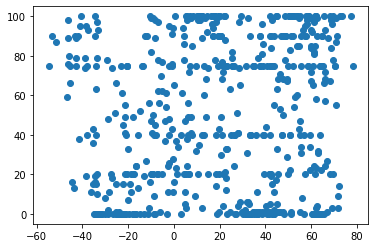

In [28]:
plt.scatter(weather_df["lat"],weather_df["cloudiness"])

## Latitude vs. Wind Speed Plot

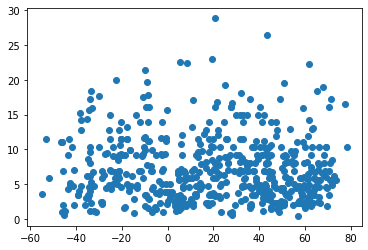

In [29]:
plt.scatter(weather_df["lat"],weather_df["wind_speed"])

## Plots for Linear Regression

### Create northen and sourthen hemisphere

In [31]:
north_hem = weather_df.loc[weather_df["lat"]>= 0]
south_hem = weather_df.loc[weather_df["lat"]< 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

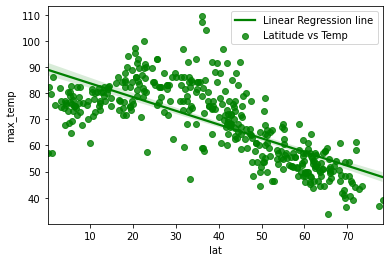

In [33]:
import seaborn as sb
sb.regplot(north_hem["lat"],north_hem["max_temp"], color = "Green")
plt.legend(labels=['Linear Regression line', 'Latitude vs Temp'])

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

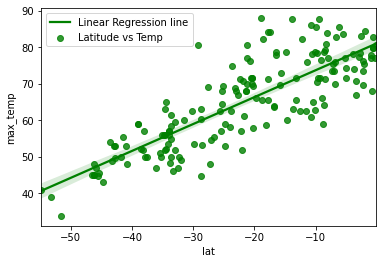

In [34]:
sb.regplot(south_hem["lat"],south_hem["max_temp"], color = "Green")
plt.legend(labels=['Linear Regression line', 'Latitude vs Temp'])

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

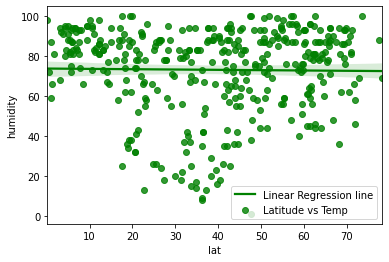

In [35]:
sb.regplot(north_hem["lat"],north_hem["humidity"], color = "Green")
plt.legend(labels=['Linear Regression line', 'Latitude vs Temp'])

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

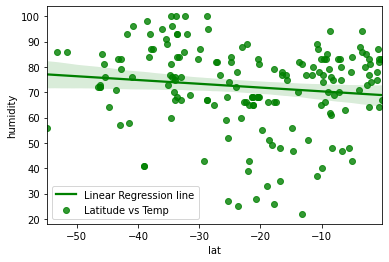

In [36]:
sb.regplot(south_hem["lat"],south_hem["humidity"], color = "Green")
plt.legend(labels=['Linear Regression line', 'Latitude vs Temp'])

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

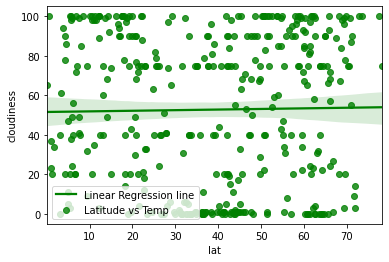

In [37]:
sb.regplot(north_hem["lat"],north_hem["cloudiness"], color = "Green")
plt.legend(labels=['Linear Regression line', 'Latitude vs Temp'])

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

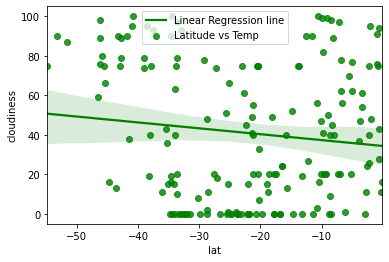

In [38]:
sb.regplot(south_hem["lat"],south_hem["cloudiness"], color = "Green")
plt.legend(labels=['Linear Regression line', 'Latitude vs Temp'])

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

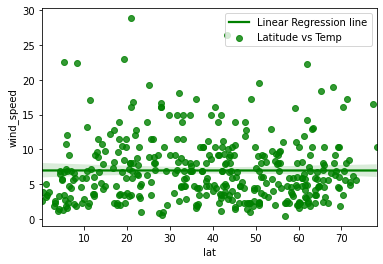

In [40]:
sb.regplot(north_hem["lat"],north_hem["wind_speed"], color = "Green")
plt.legend(labels=['Linear Regression line', 'Latitude vs Temp'])

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

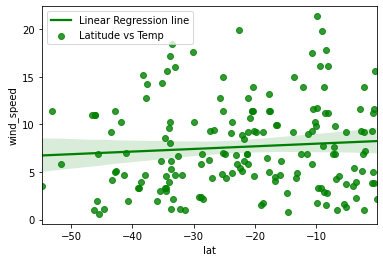

In [41]:
sb.regplot(south_hem["lat"],south_hem["wind_speed"], color = "Green")
plt.legend(labels=['Linear Regression line', 'Latitude vs Temp'])